In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pywt import wavedec
from scipy.signal import find_peaks
from scipy.stats import median_absolute_deviation
from sklearn.linear_model import lars_path

from Scripts.debiasing import debiasing_int, debiasing
from Scripts.fista_update import fista_update as fista
from Scripts.hrf_matrix import HRFMatrix
from Scripts.temporal_ta import filter_boundary as ta_filter
from Scripts.total_activation import total_activation as ta
from Scripts.total_activation import hrf_filters
from Scripts.simulate import fMRIsim
from Scripts.stability_selection import stability_selection

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 22,
         'axes.labelsize': 22,
         'axes.titlesize': 22,
         'xtick.labelsize': 22,
         'ytick.labelsize': 22}
pylab.rcParams.update(params)

seed=50
fontsize=35

Saving simulated data...
Saving simulated data...
Saving simulated data...


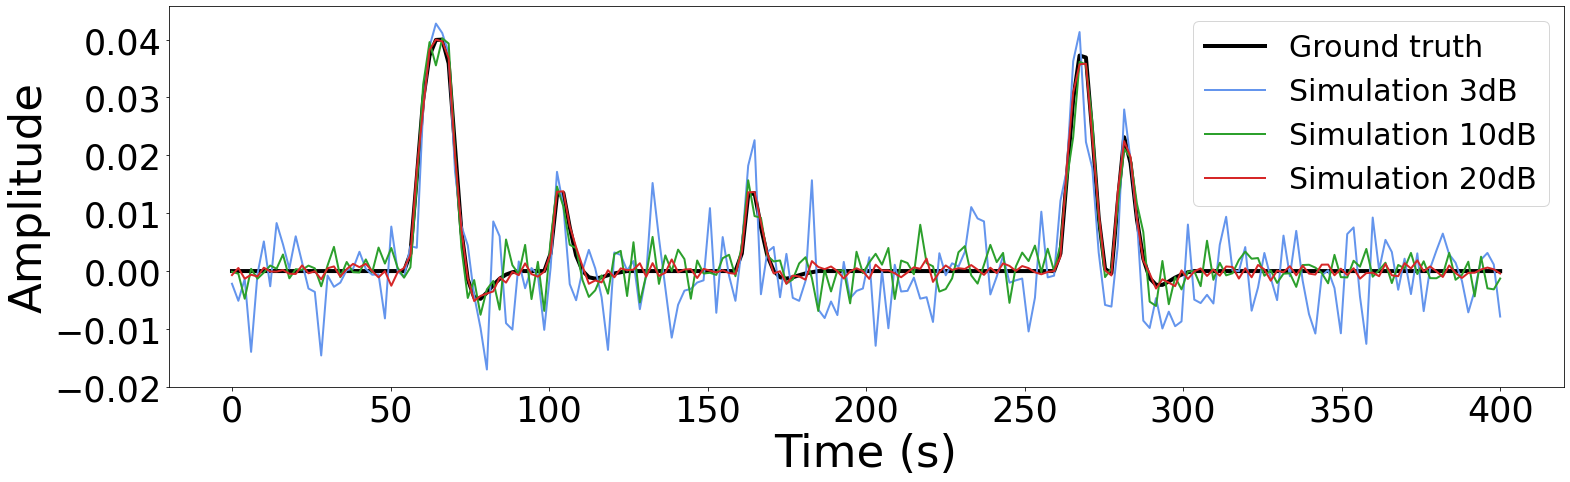

In [10]:
# Initialize class
sim = fMRIsim()

# Set parameters
sim.nvoxels = 1
sim.te = [35] # Must be a list
sim.db = 3 # SNR
sim.tr = 2
sim.duration = 400

time = np.linspace(0, sim.duration, int(sim.duration/sim.tr))

sim.r2[28:34,:] = 1
sim.r2[50:51,:] = 1
sim.r2[80:81,:] = 1
sim.r2[130:134,:] = 1
sim.r2[138:140,:] = 1

# Simulate timeseries
sim.simulate()

data = sim.simulation
ground_truth_bold = sim.bold

plt.figure(figsize=(25,7))
plt.plot(time, ground_truth_bold, label='Ground truth', color="black", linewidth=4)
plt.plot(time, data[:, 0], label='Simulation 3dB', color="cornflowerblue", linewidth=2)


sim.db = 10 # SNR
sim.simulate()
data = sim.simulation
plt.plot(time, data[:, 0], label='Simulation 10dB', color="tab:green", linewidth=2)

sim.db = 20 # SNR
sim.simulate()
data = sim.simulation
plt.plot(time, data[:, 0], label='Simulation 20dB', color="tab:red", linewidth=2)

plt.xticks(fontsize=fontsize) 
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Time (s)', fontsize=fontsize+10)
ax.set_ylabel('Amplitude', fontsize=fontsize+10)
plt.legend(fontsize=fontsize-5)
plt.show()